<a href="https://colab.research.google.com/github/renya1993/Learning/blob/main/%E3%83%95%E3%83%AB%E3%82%B9%E3%82%AF%E3%83%A9%E3%83%83%E3%83%81_%E5%8D%98%E7%B4%94%E3%83%91%E3%83%BC%E3%82%BB%E3%83%97%E3%83%AD%E3%83%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### フルスクラッチで単純パーセプロン


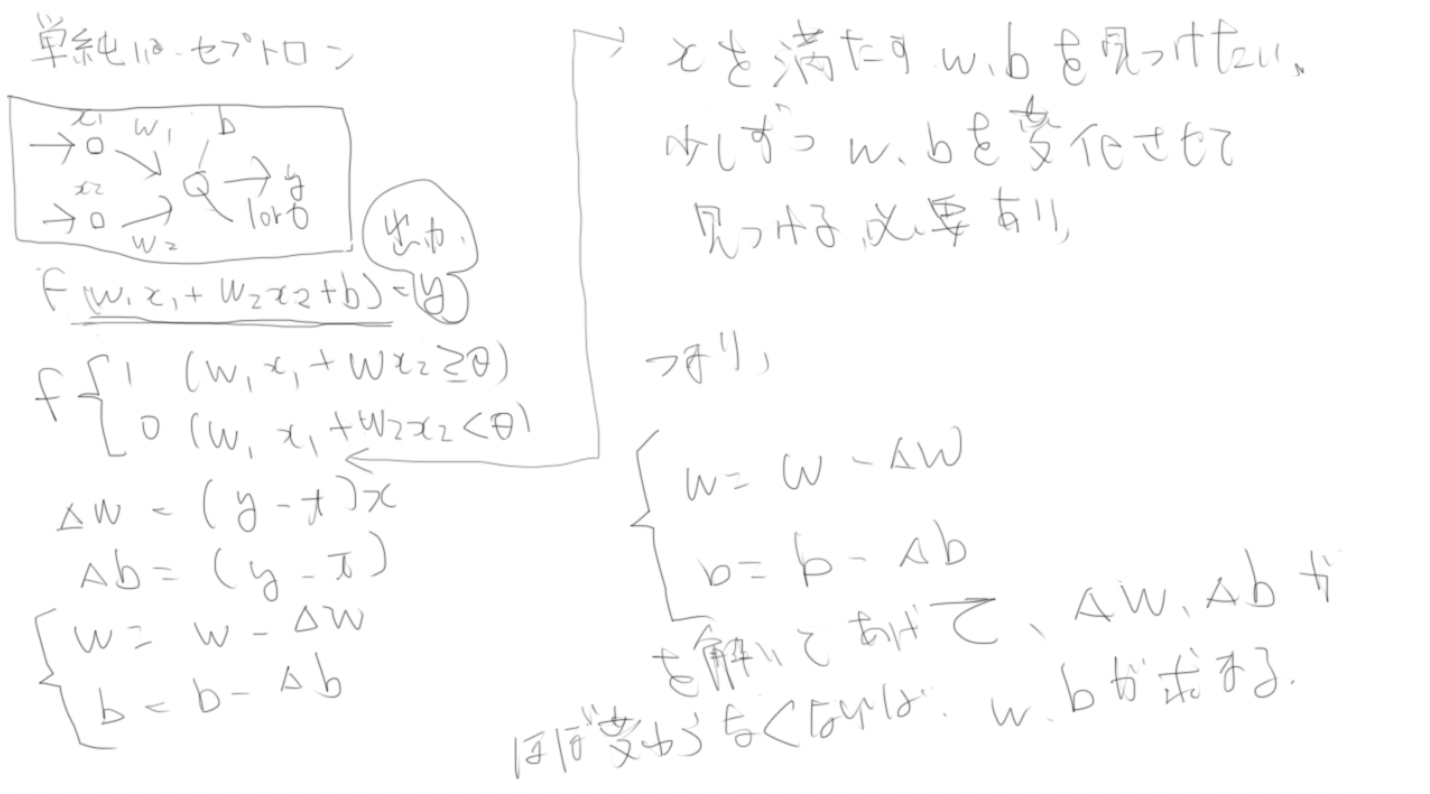

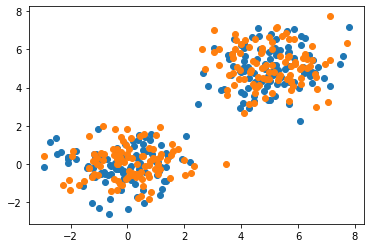

In [29]:
import matplotlib.pyplot as plt


"""
まず、データの定義
"""


import numpy as np

d =2
N=200

mean=5
"""
教師データ、テストデータ
"""
x1 = np.random.randn(N//2,d)+np.array([0,0])
x2 = np.random.randn(N//2,d)+np.array([mean,mean])

t1 = np.zeros(N//2)
t2 = np.ones(N//2)

x1_2 = np.random.randn(N//2,d)+np.array([0,0])
x2_2 = np.random.randn(N//2,d)+np.array([mean,mean])

"""
検証データ
"""
t1_2 = np.zeros(N//2)
t2_2 = np.ones(N//2)

x = np.concatenate([x1,x2],axis=0)
#tの形を変換、-1とやると自動で設定してくれる。
t = np.concatenate([t1,t2]).reshape(-1,1)

x2 = np.concatenate([x1_2,x2_2],axis=0)
#tの形を変換、-1とやると自動で設定してくれる。
t2 = np.concatenate([t1_2,t2_2]).reshape(-1,1)


plt.scatter(x[:,0],x[:,1])
plt.scatter(x2[:,0],x2[:,1])


In [30]:
w = np.zeros([2,2])
b = np.zeros(N).reshape(-1,1)

def step(y):
  return 1*(y>0)

In [31]:
y = step(np.matmul(w,x.T).T+b)

In [32]:
def myMSE(y,t):
  return ((y-t)**2).sum()

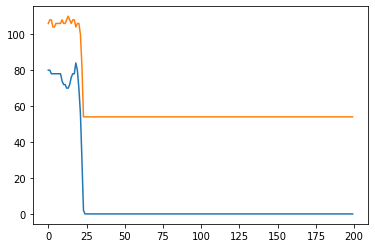

In [33]:
import matplotlib.pyplot as plt
r = 0.1
epochs = 200

corecct1 =[]
correct2 = []
for i in range(epochs):
  w=w-r*np.matmul((y-t).T,x)
  b=b-r*(y-t)
  """
  通常学習
  """
  y = step(np.matmul(w,x.T).T+b)
  corecct1.append(myMSE(y,t))
  """
  検証
  """
  y2=step(np.matmul(w,x2.T).T+b)
  correct2.append(myMSE(y2,t2))



plt.plot(np.arange(0,epochs,1),corecct1)
plt.plot(np.arange(0,epochs,1),correct2)
#適当な値=>xと、x2の間になんの関連性もないので20%も変化できたら上出来かと思う。

# クラスを使ってまとめ

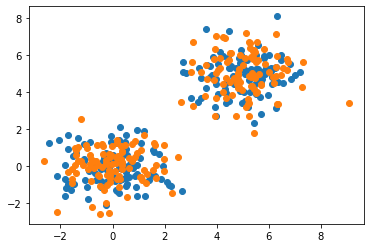

In [34]:
import matplotlib.pyplot as plt


"""
まず、データの定義
"""
import numpy as np

d =2
N=200

mean=5
"""
教師データ、テストデータ
"""
x1 = np.random.randn(N//2,d)+np.array([0,0])
x2 = np.random.randn(N//2,d)+np.array([mean,mean])

t1 = np.zeros(N//2)
t2 = np.ones(N//2)

x1_2 = np.random.randn(N//2,d)+np.array([0,0])
x2_2 = np.random.randn(N//2,d)+np.array([mean,mean])

"""
検証データ
"""
t1_2 = np.zeros(N//2)
t2_2 = np.ones(N//2)

x = np.concatenate([x1,x2],axis=0)
#tの形を変換、-1とやると自動で設定してくれる。
t = np.concatenate([t1,t2]).reshape(-1,1)

x2 = np.concatenate([x1_2,x2_2],axis=0)
#tの形を変換、-1とやると自動で設定してくれる。
t2 = np.concatenate([t1_2,t2_2]).reshape(-1,1)


plt.scatter(x[:,0],x[:,1])
plt.scatter(x2[:,0],x2[:,1])


In [39]:
"""
学習
"""

class SimplePerceptron:

  def __init__(self,train,test,input_dim,output_dim,N,epochs=20,valification=False):
    self.x = train
    self.input_dim=input_dim
    self.output_dim = output_dim
    self.w = np.zeros([self.input_dim,self.output_dim])
    self.b = np.zeros(N).reshape(-1,1)
    self.y = step(np.matmul(self.w,(self.x).T).T+b)
    self.t = test
    self.x = x
    self.valification = valification
    if self.valification == True:
      self.f = []

    print("__init___")

  def __call__(self,x):
    return step(np.matmul(self.w,self.x.T).T+self.b)

  def delta(self):
    self.delta = (self.y-self.t)
    return self.delta

  def train(self):
    for i in range(epochs):
      
      self.w=self.w-r*np.matmul((self.y-self.t).T,self.x)
      self.b=self.b-r*(self.y-self.t)
      self.y = step(np.matmul(self.w,self.x.T).T+self.b)
      if self.valification == True:
        f.append(y)
        self.f=f
      self.valification=False
    
    if self.valification == True:
      return self.y,self.w,self.b,self.f
    else:
      return self.y,self.w,self.b

SimplePerceptron = SimplePerceptron(train=x,
                                    test=t,
                                    input_dim=2,
                                    output_dim=2,
                                    N=N,
                                    epochs=200)


y=SimplePerceptron.train()[0]
y2 = SimplePerceptron(x2)

"""
学習に使う関数
"""
def myMSE(y,t):
  return ((y-t)**2).sum()

def step(y):
  return 1*(y>0)

"""
学習
"""

y=SimplePerceptron.train()[0]

print("値があってない数Train_test",myMSE(y,t))
print("値があってない数Validation",myMSE(y2,t))

__init___
値があってない数Train_test 0.0
値があってない数Validation 0.0
